# Cox

- Author: Wen Xin
- Description: This file is about using cox as model to find which day is the most possible day that users will do retention and draw the survival line of it.

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
from lifelines import CoxPHFitter
import numpy as np
import pandas as pd
from lifelines.datasets import load_rossi

plt.style.use('bmh')

In [54]:
data=pd.read_csv('new_dataset_w9_final.csv')

In [55]:
data.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,w1_total_orders,w2_total_orders,w3_total_orders,w4_total_orders,...,log_update2create_time_max,dummy_log_send2update_time_max,log_send2update_time_max,kitchen_royalty,staple_price,like_num,dummy_like_num,dummy_has_kitchen_info,dummy_staple_price,comment_perc
0,0.663138,10,3.0,4.888889,1.0,12.0,4.0,2.0,2.0,6.0,...,8.895493,1.0,11.227614,1.875000,2.0,11.0,1.0,1,1,0.250000
1,0.602960,18,7.0,2.941176,1.0,11.0,8.0,5.0,3.0,1.0,...,11.053031,1.0,11.297663,1.833333,1.0,0.0,0.0,1,1,0.227273
2,0.391684,13,5.0,4.500000,2.0,12.0,3.0,2.0,2.0,1.0,...,9.829733,1.0,11.237844,2.600000,2.0,116.0,1.0,1,1,0.923077
3,0.337142,9,5.0,8.625000,1.0,53.0,2.0,0.0,0.0,0.0,...,9.625426,1.0,11.244497,2.250000,3.0,40.0,1.0,1,1,0.000000
4,0.535490,12,5.0,3.454545,1.0,6.0,0.0,0.0,0.0,2.0,...,8.668712,1.0,11.235207,1.363636,2.0,0.0,0.0,1,1,0.800000


In [56]:
daily_features=pd.read_csv('daily_features.csv')

In [57]:
daily_features.head()

,04/04/2016count,04/05/2016count,04/06/2016count,04/07/2016count,04/08/2016count,04/09/2016count,04/10/2016count,04/11/2016count,04/12/2016count,04/13/2016count,...,06/05/2016count,06/06/2016count,06/07/2016count,06/08/2016count,06/09/2016count,06/10/2016count,06/11/2016count,06/12/2016count,gap,user_id
0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100002020
1,NaN,1.0,1.0,3.0,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100002033
2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100002035
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,100002036
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,100002040


In [58]:
cols =['04/04/2016count', '04/05/2016count', '04/06/2016count',
       '04/07/2016count', '04/08/2016count', '04/09/2016count',
       '04/10/2016count', '04/11/2016count', '04/12/2016count',
       '04/13/2016count', '04/14/2016count', '04/15/2016count',
       '04/16/2016count', '04/17/2016count', '04/18/2016count',
       '04/19/2016count', '04/20/2016count', '04/21/2016count',
       '04/22/2016count', '04/23/2016count', '04/24/2016count',
       '04/25/2016count', '04/26/2016count', '04/27/2016count',
       '04/28/2016count', '04/29/2016count', '04/30/2016count',
       '05/01/2016count', '05/02/2016count', '05/03/2016count',
       '05/04/2016count', '05/05/2016count', '05/06/2016count',
       '05/07/2016count', '05/08/2016count', '05/09/2016count',
       '05/10/2016count', '05/11/2016count', '05/12/2016count',
       '05/13/2016count', '05/14/2016count', '05/15/2016count',
       '05/16/2016count', '05/17/2016count', '05/18/2016count',
       '05/19/2016count', '05/20/2016count', '05/21/2016count',
       '05/22/2016count', '05/23/2016count', '05/24/2016count',
       '05/25/2016count', '05/26/2016count', '05/27/2016count',
       '05/28/2016count', '05/29/2016count', '05/30/2016count',
       '05/31/2016count', '06/01/2016count', '06/02/2016count',
       '06/03/2016count', '06/04/2016count', '06/05/2016count',
       '06/06/2016count', '06/07/2016count', '06/08/2016count',
       '06/09/2016count', '06/10/2016count', '06/11/2016count',
       '06/12/2016count']

In [59]:
dailys=[]

In [60]:
for i in range(len(daily_features)):
    days=[]
    for j,c in enumerate(cols):
        if not np.isnan(daily_features[c].iloc[i]):
            days.append(j)
    if len(days)>=2:
        dailys.append((days[-1]-days[-2]+1))
    if len(days)==1:
        dailys.append((j-days[-1]+1))
    if len(days)==0:
        dailys.append((0))

In [61]:
len(daily_features)

191855

In [62]:
len(dailys)

191855

In [63]:
mygap=np.array(dailys)

In [64]:
len(data)

191855

In [65]:
data['my_gap']=mygap

In [66]:
list(data.columns)

['order_sd',
 'active_days',
 'lastgap',
 'avg_gap',
 'min_gap',
 'max_gap',
 'w1_total_orders',
 'w2_total_orders',
 'w3_total_orders',
 'w4_total_orders',
 'w5_total_orders',
 'w6_total_orders',
 'w7_total_orders',
 'label',
 'first_order',
 'last_order',
 'accountLength',
 'overall_time_mean',
 'update2create_time_mean',
 'send2update_time_mean',
 'overall_time_min',
 'update2create_time_min',
 'send2update_time_min',
 'overall_time_max',
 'update2create_time_max',
 'send2update_time_max',
 'intime_rate',
 'last_coupon_fee',
 'last_send_type',
 'order_nums',
 'city_id',
 'sex',
 'age',
 'login_platform_b',
 'app_version_b',
 'age_na',
 'lastgap_na',
 'avg_gap_na',
 'min_gap_na',
 'max_gap_na',
 'overall_time_mean_na',
 'update2create_time_mean_na',
 'send2update_time_mean_na',
 'overall_time_min_na',
 'update2create_time_min_na',
 'send2update_time_min_na',
 'overall_time_max_na',
 'update2create_time_max_na',
 'send2update_time_max_na',
 'w1_avg_couponworth',
 'w2_avg_couponworth',

In [67]:
X=data.drop(['lastgap'],axis=1)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train, test = train_test_split(X, test_size=0.2, random_state=42)

In [70]:
cols=list(train.columns)

In [71]:
cols

['order_sd',
 'active_days',
 'avg_gap',
 'min_gap',
 'max_gap',
 'w1_total_orders',
 'w2_total_orders',
 'w3_total_orders',
 'w4_total_orders',
 'w5_total_orders',
 'w6_total_orders',
 'w7_total_orders',
 'label',
 'first_order',
 'last_order',
 'accountLength',
 'overall_time_mean',
 'update2create_time_mean',
 'send2update_time_mean',
 'overall_time_min',
 'update2create_time_min',
 'send2update_time_min',
 'overall_time_max',
 'update2create_time_max',
 'send2update_time_max',
 'intime_rate',
 'last_coupon_fee',
 'last_send_type',
 'order_nums',
 'city_id',
 'sex',
 'age',
 'login_platform_b',
 'app_version_b',
 'age_na',
 'lastgap_na',
 'avg_gap_na',
 'min_gap_na',
 'max_gap_na',
 'overall_time_mean_na',
 'update2create_time_mean_na',
 'send2update_time_mean_na',
 'overall_time_min_na',
 'update2create_time_min_na',
 'send2update_time_min_na',
 'overall_time_max_na',
 'update2create_time_max_na',
 'send2update_time_max_na',
 'w1_avg_couponworth',
 'w2_avg_couponworth',
 'w3_avg_co

In [72]:
cols.remove('label')
cols.remove('my_gap')

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
train_scaled=scaler.fit_transform(train[cols])

In [77]:
import sklearn.decomposition as skd

In [78]:
pca = skd.PCA()

In [79]:
train_pcad = pca.fit_transform(train_scaled)

In [80]:
import matplotlib.pyplot as plt

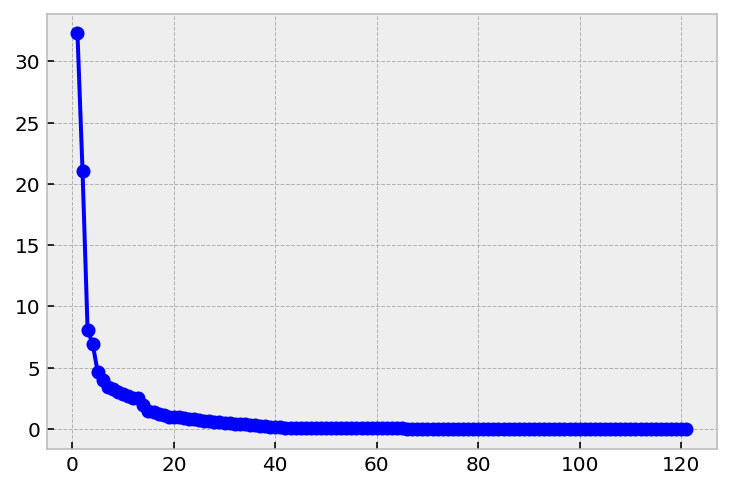

In [81]:
# 看图， 5比较合适
plt.plot(range(1,122),pca.explained_variance_,'b-o')

In [82]:
pca_components=pd.DataFrame(train_pcad)[[0,1,2,3,4]]

In [83]:
pca_components.columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [84]:
pca_columns=['pca_1','pca_2','pca_3','pca_4','pca_5']

In [85]:
pca_components.corr()

,pca_1,pca_2,pca_3,pca_4,pca_5
pca_1,1.000000e+00,1.208177e-15,8.942532e-16,-2.566081e-15,-8.109495e-16
pca_2,1.208177e-15,1.000000e+00,7.475934e-16,1.652146e-16,2.853761e-16
pca_3,8.942532e-16,7.475934e-16,1.000000e+00,6.401384e-16,2.250465e-15
pca_4,-2.566081e-15,1.652146e-16,6.401384e-16,1.000000e+00,3.442552e-15
pca_5,-8.109495e-16,2.853761e-16,2.250465e-15,3.442552e-15,1.000000e+00


In [86]:
len(train)

153484

In [87]:
len(pca_components)

153484

In [88]:
for c in pca_columns:
    train[c]=pca_components[c]

In [89]:
new_train=train[['pca_1','pca_2','pca_3','pca_4','pca_5','my_gap','label']]

In [90]:
new_train.head(10)

,pca_1,pca_2,pca_3,pca_4,pca_5,my_gap,label
2557,-3.762867,-4.680837,1.371402,0.132330,2.686205,2,0.0
104450,-3.882019,-4.555256,1.291051,-0.080328,3.156202,10,0.0
140622,-3.035374,-4.085439,0.027065,2.330186,0.637758,47,0.0
129338,2.531195,-0.477359,1.883783,-3.297314,-0.003258,54,0.0
163885,NaN,NaN,NaN,NaN,NaN,27,0.0
184858,NaN,NaN,NaN,NaN,NaN,11,0.0
46141,0.803138,-1.205829,6.113242,0.115939,-4.897947,57,0.0
82608,-3.734943,-4.686155,0.991288,0.232170,2.448858,2,0.0
59493,2.226474,-0.803380,1.722836,-2.709656,-0.519506,8,1.0
39773,-3.469907,-4.385936,1.267614,1.385206,1.423058,41,0.0


In [91]:
new_train=new_train.fillna(0)

In [92]:
cph = CoxPHFitter()
cph.fit(new_train, 'my_gap', 'label')

<lifelines.CoxPHFitter: fitted with 153484 observations, 108250 censored>

<lifelines.CoxPHFitter: fitted with 153484 observations, 108250 censored>
      duration col = 'my_gap'
         event col = 'label'
number of subjects = 153484
  number of events = 45234
    log-likelihood = -518209.92
  time fit was run = 2019-04-16 23:45:20 UTC

---
       coef exp(coef)  se(coef)     z    p  -log2(p)  lower 0.95  upper 0.95
pca_1  0.00      1.00      0.00  0.62 0.54      0.90       -0.00        0.00
pca_2  0.00      1.00      0.00  0.39 0.70      0.52       -0.00        0.00
pca_3  0.00      1.00      0.00  0.27 0.79      0.34       -0.00        0.00
pca_4 -0.00      1.00      0.00 -0.96 0.33      1.58       -0.01        0.00
pca_5  0.00      1.00      0.00  0.06 0.95      0.07       -0.00        0.00
---
Concordance = 0.50
Log-likelihood ratio test = 1.54 on 5 df, -log2(p)=0.14


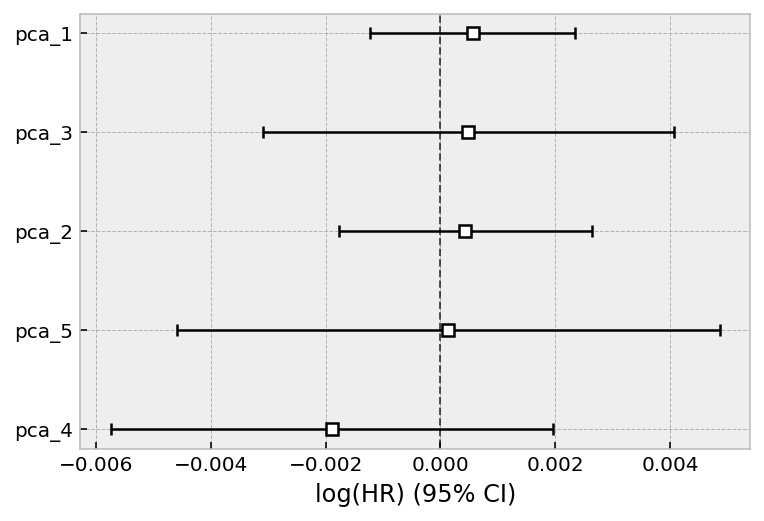

In [93]:
cph.print_summary()
cph.plot();

In [94]:
timelines=[i for i in range(1,84)]

In [95]:
train_survival_f=cph.predict_survival_function(new_train, times=timelines).T

In [102]:
import seaborn as sns

In [101]:
train_survival_f.mean()

1     0.996800
2     0.939026
3     0.907312
4     0.884182
5     0.852149
6     0.826530
7     0.805023
8     0.780857
9     0.767470
10    0.755804
11    0.745513
12    0.736571
13    0.727035
14    0.719500
15    0.711182
16    0.705944
17    0.701248
18    0.697147
19    0.693161
20    0.688152
21    0.684118
22    0.679495
23    0.676340
24    0.673455
25    0.670583
26    0.667966
27    0.664022
28    0.661006
29    0.657604
30    0.655336
        ...   
54    0.612615
55    0.609254
56    0.607673
57    0.605872
58    0.604081
59    0.602192
60    0.600112
61    0.597236
62    0.589600
63    0.585442
64    0.581780
65    0.577451
66    0.571674
67    0.567972
68    0.558193
69    0.538022
70    0.502411
71    0.502411
72    0.502411
73    0.502411
74    0.502411
75    0.502411
76    0.502411
77    0.502411
78    0.502411
79    0.502411
80    0.502411
81    0.502411
82    0.502411
83    0.502411
Length: 83, dtype: float64

No handles with labels found to put in legend.


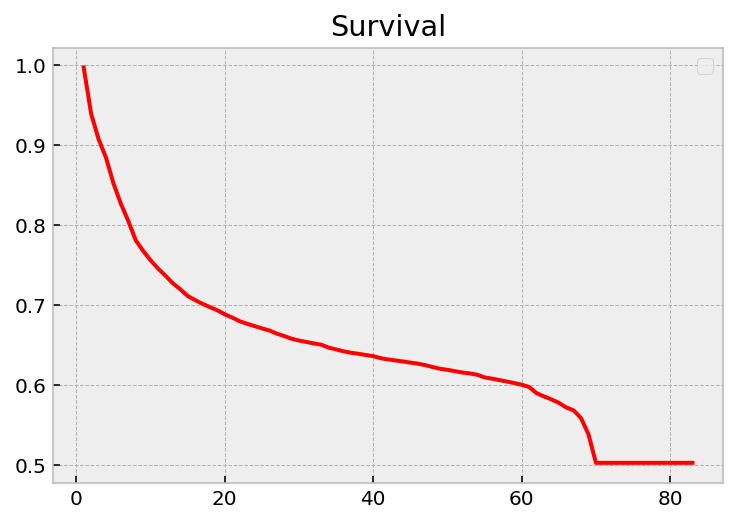

In [104]:
plt.title("Survival")
plt.plot(train_survival_f.mean(), color='red', linewidth=2)
plt.legend()